<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%3D%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80VSKNN%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형 회귀 VS KNN 회귀

In [1]:
import numpy as np
n =1000
heights = np.random.normal(174,8,n)

In [11]:
heights2 = [height//5 for height in heights ]
heights2

[35.0,
 34.0,
 33.0,
 34.0,
 34.0,
 33.0,
 35.0,
 37.0,
 38.0,
 34.0,
 36.0,
 35.0,
 38.0,
 34.0,
 35.0,
 34.0,
 37.0,
 31.0,
 35.0,
 33.0,
 35.0,
 33.0,
 37.0,
 35.0,
 35.0,
 37.0,
 34.0,
 35.0,
 32.0,
 35.0,
 37.0,
 34.0,
 35.0,
 35.0,
 31.0,
 38.0,
 33.0,
 35.0,
 38.0,
 35.0,
 34.0,
 35.0,
 35.0,
 36.0,
 35.0,
 31.0,
 35.0,
 37.0,
 35.0,
 33.0,
 33.0,
 33.0,
 35.0,
 37.0,
 33.0,
 36.0,
 34.0,
 34.0,
 33.0,
 36.0,
 33.0,
 36.0,
 37.0,
 34.0,
 36.0,
 34.0,
 35.0,
 34.0,
 37.0,
 35.0,
 35.0,
 33.0,
 33.0,
 35.0,
 34.0,
 33.0,
 35.0,
 37.0,
 33.0,
 33.0,
 34.0,
 33.0,
 35.0,
 34.0,
 36.0,
 36.0,
 34.0,
 33.0,
 31.0,
 31.0,
 35.0,
 35.0,
 37.0,
 33.0,
 36.0,
 33.0,
 35.0,
 36.0,
 35.0,
 34.0,
 36.0,
 34.0,
 34.0,
 38.0,
 34.0,
 31.0,
 35.0,
 35.0,
 34.0,
 34.0,
 36.0,
 36.0,
 32.0,
 34.0,
 35.0,
 37.0,
 33.0,
 33.0,
 39.0,
 32.0,
 36.0,
 35.0,
 36.0,
 34.0,
 34.0,
 33.0,
 35.0,
 35.0,
 31.0,
 32.0,
 32.0,
 35.0,
 33.0,
 31.0,
 34.0,
 33.0,
 34.0,
 33.0,
 31.0,
 37.0,
 37.0,
 35.0,
 33.0,

In [12]:
import pandas as pd
se = pd.Series(heights2)
svc = se.value_counts()

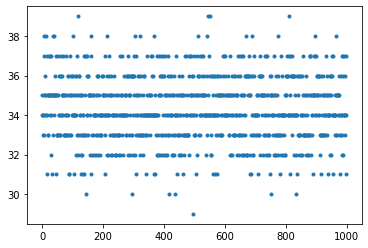

In [13]:
import matplotlib.pyplot as plt
plt.plot(heights2, '.')
plt.show()

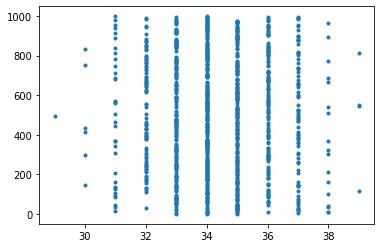

In [14]:

plt.plot(se.values, se.index, '.')
plt.show()

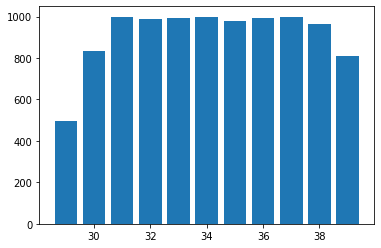

In [15]:
plt.bar(se.values, se.index)
plt.show()

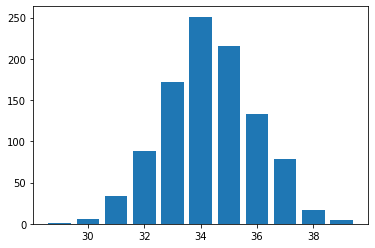

In [16]:
plt.bar(svc.index, svc.values)
plt.show()

In [17]:
bmi = np.random.normal(21,1,n)
weights = bmi*(heights**2)/10000 #bmi = w/(txt), t의 단위는 m

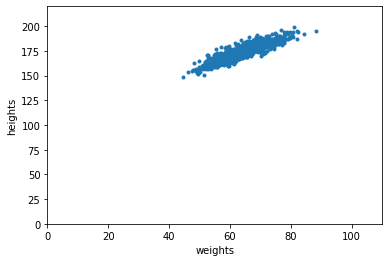

In [18]:
plt.plot(weights, heights, '.')
plt.xlabel('weights')
plt.ylabel('heights')
plt.xlim(0,110)
plt.ylim(0,220)
plt.show()

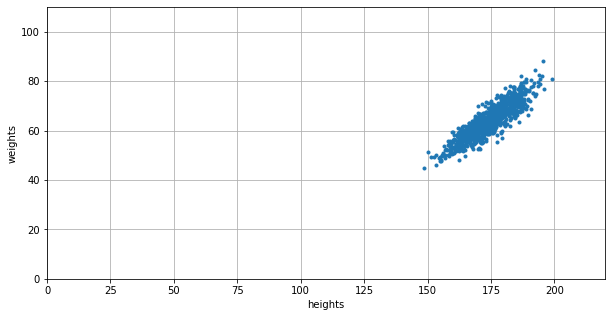

In [20]:
plt.figure(figsize=(10,5))
plt.plot(heights,weights, '.')
plt.ylabel('weights')
plt.xlabel('heights')
plt.ylim(0,110)
plt.xlim(0,220)
plt.grid(True)
plt.show()

In [21]:
#xs = [[weight] for weight in weights]
xs = weights.reshape(-1, 1) 
#독립변수는 여러 개의 특성으로 구성할 수 ML 모델에서는 2차원 배열 형태로 학습 데이터를 입력받음
xs.shape

(1000, 1)

In [62]:
xs2 = xs.reshape(5,20,-1)
xs2.shape

(5, 20, 10)

In [64]:
#tensor 데이터
#cannot reshape array of size 1000 into shape (3,20,newaxis)
#xs3=xs.reshape(3,20,-1)
#xs3.shape

ValueError: ignored

In [39]:
#ys = heights 
#종속 변수는 하나의 값이며 ML 모델에서 1차원 배열 형태로 학습 데이터를 입력받음
ys.shape

(1000,)

In [24]:
from sklearn.linear_model import LinearRegression

In [35]:
lr_model = LinearRegression() #모델 개체 생성
lr_model.fit(xs,ys) #학습
lr_model.coef_, lr_model.intercept_ #가중치, 편향

(array([1.05940479]), 106.40136727614531)

In [36]:
txs = np.array([[50],[60],[67],[70],[94]])

In [37]:
pred_val1 = lr_model.predict(txs) #예측하시오
pred_val1

array([159.37160669, 169.96565458, 177.38148809, 180.55970246,
       205.98541738])

In [42]:
from sklearn.model_selection import train_test_split
train_xs, test_xs, train_ys, test_ys = train_test_split(xs,ys,train_size=0.8)
train_xs.shape, test_xs.shape, train_ys.shape, test_ys.shape

((800, 1), (200, 1), (800,), (200,))

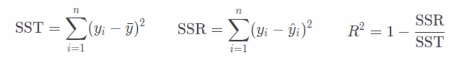

SST에 사용한 값을 평균과 실제 값

SSR에 사용한 값은 평균과 예측 값

In [45]:
lr_model = LinearRegression() #모델 개체 생성
lr_model.fit(xs,ys) #학습
train_score = lr_model.score(train_xs,train_ys) #평가하시오.
test_score = lr_model.score(test_xs,test_ys) #평가하시오.
train_score,test_score

(0.7784610195176016, 0.7328812945111024)

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor() #모델 개체 생성
knr_model.fit(xs, ys) #학습
pred_val2 = lr_model.predict(txs) #예측하시오
pred_val2

array([159.37160669, 169.96565458, 177.38148809, 180.55970246,
       205.98541738])

In [47]:
pred_val1

array([159.37160669, 169.96565458, 177.38148809, 180.55970246,
       205.98541738])

In [48]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor() #모델 개체 생성
knr_model.fit(xs, ys) #학습
train_score = knr_model.score(train_xs,train_ys) #평가하시오.
test_score = knr_model.score(test_xs,test_ys) #평가하시오.
train_score, test_score

(0.8260969946530125, 0.7987069027420928)

KNN에서 주의할점

In [51]:
pv1 = lr_model.predict([[35],[82], [85], [90], [100], [108],[120],[130]])
pv2 = knr_model.predict([[35],[82], [85], [90], [100], [108],[120],[130]])
pv1, pv2

(array([143.48053487, 193.27255992, 196.45077428, 201.74779822,
        212.34184611, 220.81708441, 233.52994187, 244.12398976]),
 array([153.55353193, 193.8769482 , 192.77668299, 192.77668299,
        192.77668299, 192.77668299, 192.77668299, 192.77668299]))

In [52]:
weights.max()

88.3101142683545

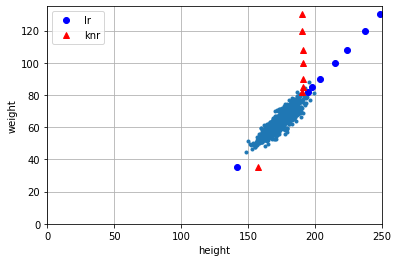

In [65]:
plt.plot(heights,weights,'.')
plt.plot([141.54,194.43,197.81,203.44,214.69,223.69,237.20,248.45],[35,82,85,90,100,108,120,130],'bo',label='lr')
plt.plot([157.05,190.43,190.83,190.83,190.93,190.83,190.38,190.38],[35,82,85,90,100,108,120,130],'r^',label='knr')
plt.xlabel("height")
plt.ylabel("weight")
plt.xlim(0,250)
plt.ylim(0,135)
plt.grid(True)
plt.legend()
plt.show()

회귀 vs 분류

지도학습 vs 비지도학습

KMeans